In [100]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt, pi

In [98]:
def gaussian(x, mu, sig):
    return 1./(sqrt(2.*pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

/Users/aditpras/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [366]:
def plot_pos(mu, sigma, rot=0, _3d=False):
    p1 = mu - 3*sigma
    p2 = mu + 3*sigma
    
    fig = plt.figure(figsize=(20,5))
    plt.title("Mean {}, SD {}, rot {}".format(mu, sigma, rot))

    x = np.linspace(-30.0, 30.0, 1e4)
    y = np.zeros((len(x)), dtype=np.complex128)

    p = np.linspace(p1, p2, 1000)
    p_amp = []
    for f in p:
        phase = (f-mu)*rot
        mag = gaussian(f, mu, sigma) * np.exp(1j*phase)
        p_amp.append(mag)        
        e = np.exp(1j*x*f)
        y += mag * e

    if _3d:
        #fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(np.real(y), np.imag(y), x, zdir='x')
    else:
        plt.subplot(1, 2, 1)        
        plt.plot()
        p_amp = np.array(p_amp, dtype=np.complex128)
        plt.xlim(0, 5)
        amp_max = np.max(np.real(p_amp))
        plt.ylim(-amp_max, amp_max)
        plt.plot(p, np.real(p_amp))

        plt.subplot(1, 2, 2)
        plt.plot(x, np.abs(y))
        plt.plot(x, np.real(y))    
        plt.show()
    
    return y

/Users/aditpras/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


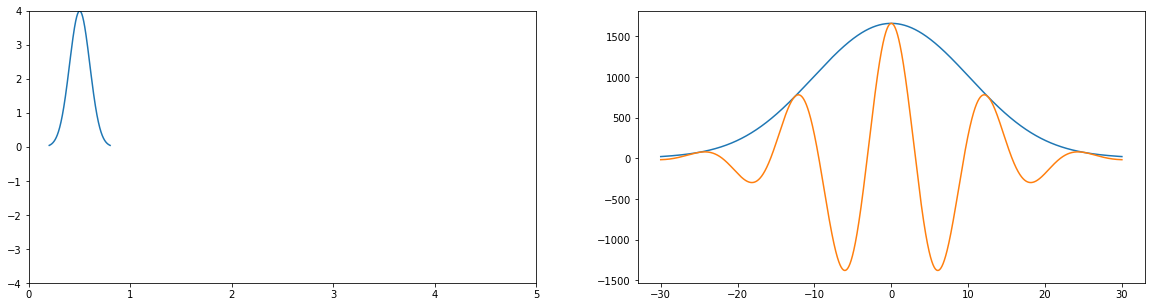

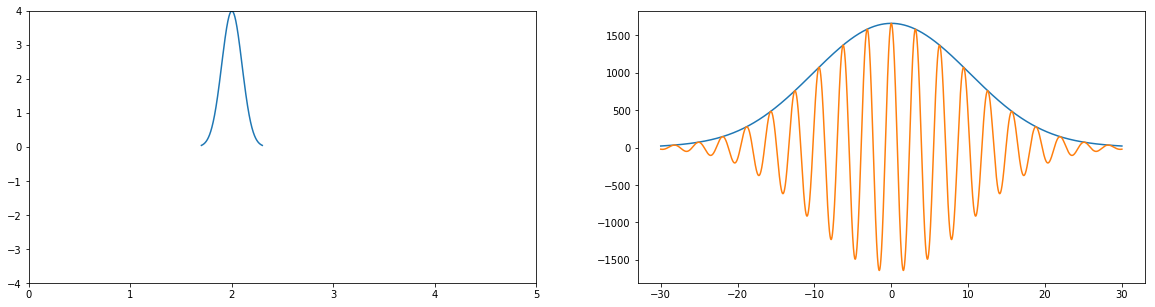

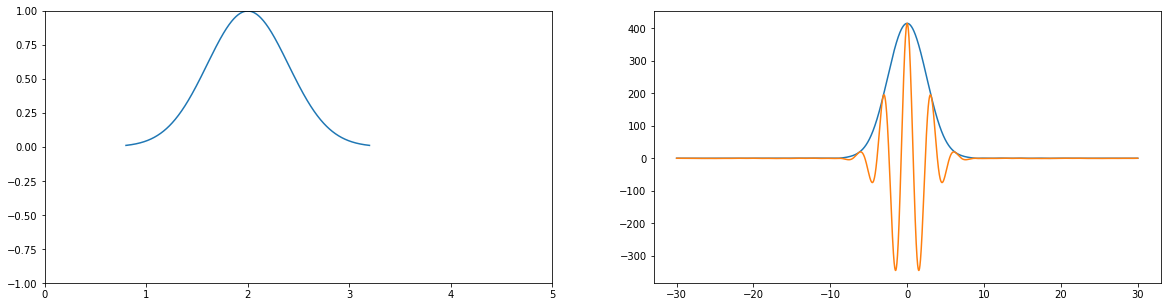

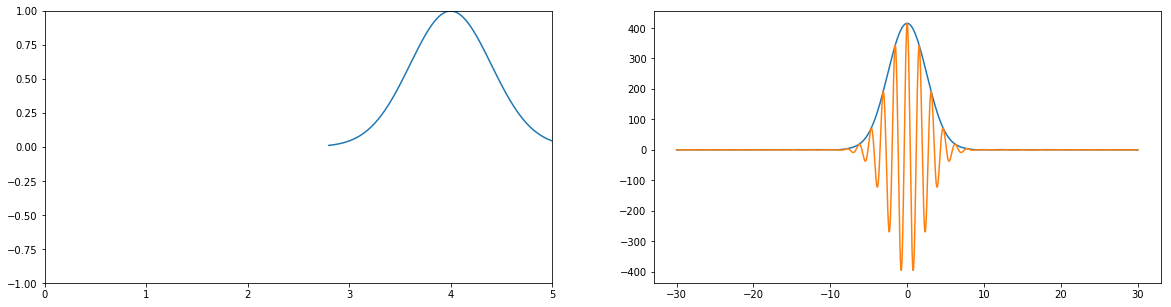

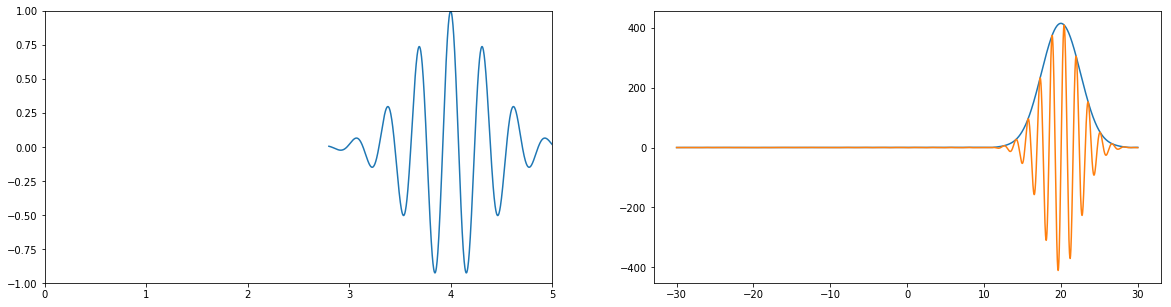

In [367]:
y = plot_pos(0.5, 0.1)
y = plot_pos(2, 0.1)
y = plot_pos(2, 0.4)
y = plot_pos(4, 0.4)
y = plot_pos(4, 0.4, rot=-20)

/Users/aditpras/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


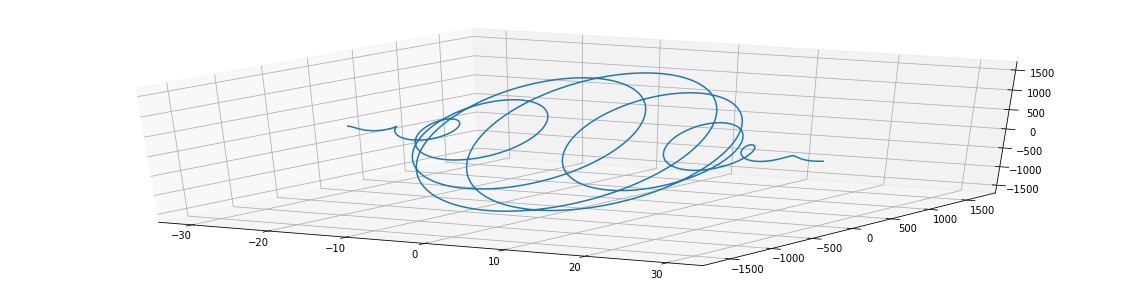

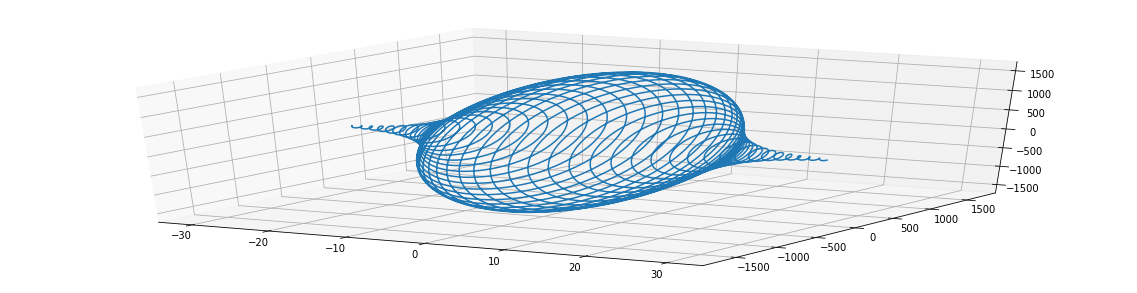

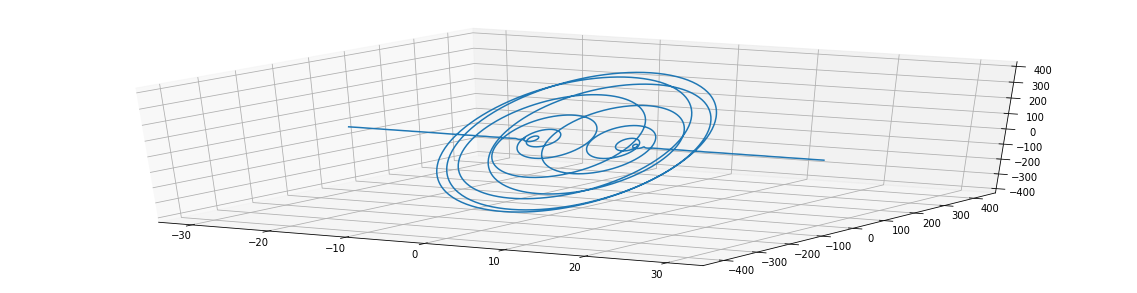

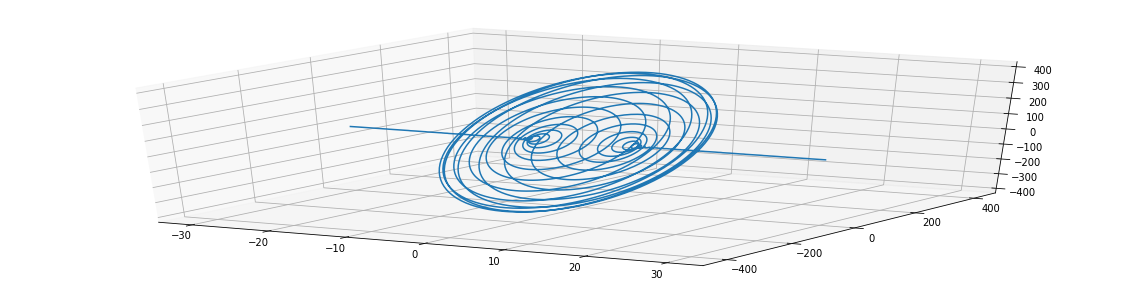

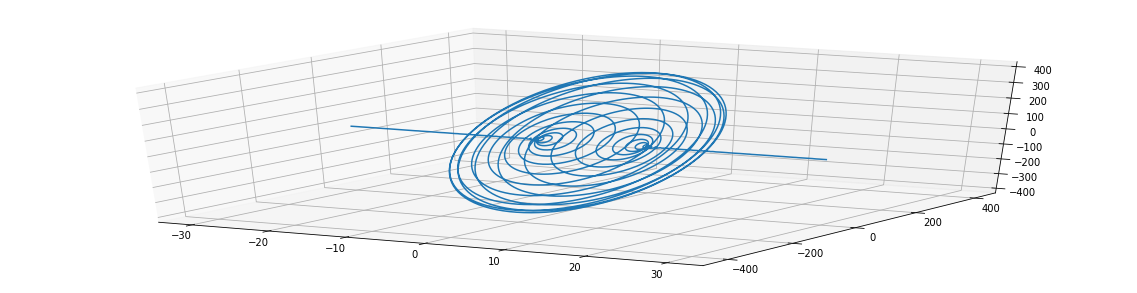

In [368]:
y = plot_pos(1, 0.1, _3d=True)
y = plot_pos(5, 0.1, _3d=True)
y = plot_pos(5, 0.4, _3d=True)
y = plot_pos(10, 0.4, _3d=True)
y = plot_pos(10, 0.4, rot=-1, _3d=True)